1. Importing all the necessary libraries

In [1]:
import sklearn
import matplotlib
import keras
import sys
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

2. Loading the data from the direcory

In [2]:
dataset=pd.read_csv(r"C:\Users\roops\OneDrive\Desktop\Balu Files\Identifying Heart Diseases using Deep Learning\dataset.csv")

3. Data pre-processing

In [3]:
data=dataset[-dataset.isin(["?"])]
print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [4]:
data=data.dropna(axis=0)

In [5]:
print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [6]:
data=data.apply(pd.to_numeric)
print(data.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Risk                 int64
dtype: object


In [7]:
data.describe

<bound method NDFrame.describe of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0      

4. Plot a histogram for each variable

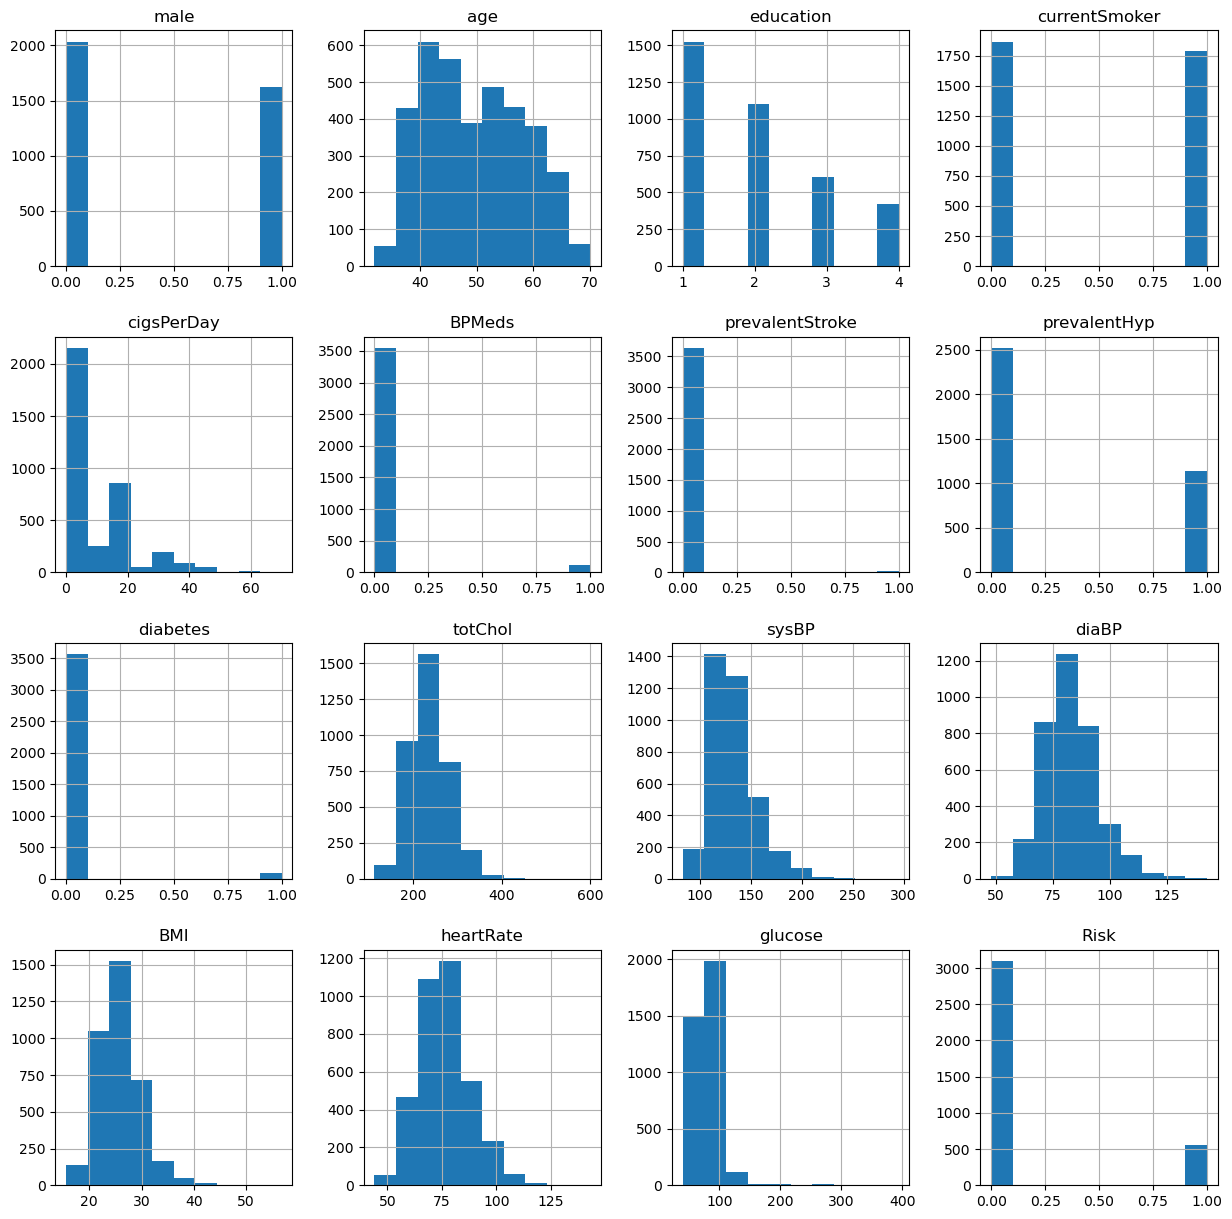

In [8]:
data.hist(figsize=(15,15))
plt.show()

5. Splitting testing and training data

In [9]:
from sklearn import model_selection

X = np.array(data.drop(['Risk'], 1))
y = np.array(data['Risk'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

C:\Users\roops\AppData\Local\Temp\ipykernel_10564\2900593545.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Risk'], 1))


In [10]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)


In [11]:
print (Y_train.shape)
print (Y_train)

(2926, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


6. Building a Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

def create_advanced_model():
    model = Sequential()

    model.add(Dense(64, input_dim=15, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model



In [13]:
model = create_advanced_model()

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               

In [14]:
model.fit(X_train, Y_train, epochs=30, batch_size=10, verbose = 1)

Epoch 1/30


293/293 [==============================] - 5s 5ms/step - loss: 0.6648 - accuracy: 0.7027
Epoch 2/30
293/293 [==============================] - 1s 5ms/step - loss: 0.4865 - accuracy: 0.8072
Epoch 3/30
293/293 [==============================] - 1s 4ms/step - loss: 0.4630 - accuracy: 0.8223
Epoch 4/30
293/293 [==============================] - 1s 4ms/step - loss: 0.4429 - accuracy: 0.8257
Epoch 5/30
293/293 [==============================] - 1s 4ms/step - loss: 0.4322 - accuracy: 0.8394
Epoch 6/30
293/293 [==============================] - 1s 4ms/step - loss: 0.4282 - accuracy: 0.8411
Epoch 7/30
293/293 [==============================] - 1s 5ms/step - loss: 0.4144 - accuracy: 0.8404
Epoch 8/30
293/293 [==============================] - 2s 5ms/step - loss: 0.4133 - accuracy: 0.8414
Epoch 9/30
293/293 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.8424
Epoch 10/30
293/293 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.83

7. Binary Classification Problem

In [15]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary)

[0 0 0 ... 0 1 0]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_complex_binary_model():
 
    model = Sequential()
    
    model.add(Dense(64, input_dim=15, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())  # Normalize the activations of the previous layer at each batch
    model.add(Dropout(0.3))  # Regularization by randomly setting a fraction of input units to 0 at each update

   
    model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    
    model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    
    model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    
    model.add(Dense(1, activation='sigmoid'))

   
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model


complex_binary_model = create_complex_binary_model()


print(complex_binary_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1024      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [17]:
complex_binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
293/293 [==============================] - 7s 6ms/step - loss: 0.6418 - accuracy: 0.6781
Epoch 2/100
293/293 [==============================] - 2s 6ms/step - loss: 0.4816 - accuracy: 0.8120
Epoch 3/100
293/293 [==============================] - 2s 7ms/step - loss: 0.4512 - accuracy: 0.8281
Epoch 4/100
293/293 [==============================] - 2s 7ms/step - loss: 0.4413 - accuracy: 0.8349
Epoch 5/100
293/293 [==============================] - 2s 8ms/step - loss: 0.4266 - accuracy: 0.8353
Epoch 6/100
293/293 [==============================] - 2s 7ms/step - loss: 0.4257 - accuracy: 0.8353
Epoch 7/100
293/293 [==============================] - 2s 8ms/step - loss: 0.4204 - accuracy: 0.8380
Epoch 8/100
293/293 [==============================] - 2s 7ms/step - loss: 0.4214 - accuracy: 0.8380
Epoch 9/100
293/293 [==============================] - 2s 6ms/step - loss: 0.4141 - accuracy: 0.8465
Epoch 10/100
293/293 [==============================] - 2s 6ms/step - loss: 0.4087 - accura

8. Results 

In [18]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

23/23 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8483606557377049
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       630
           1       0.36      0.12      0.18       102

    accuracy                           0.85       732
   macro avg       0.62      0.54      0.55       732
weighted avg       0.80      0.85      0.81       732



In [19]:
binary_pred = np.round(complex_binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

23/23 [==============================] - 0s 3ms/step
Results for Binary Model
0.8620218579234973
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       630
           1       0.53      0.09      0.15       102

    accuracy                           0.86       732
   macro avg       0.70      0.54      0.54       732
weighted avg       0.82      0.86      0.82       732

